## Steps :
- Import Libraries
- Load Dataset
- EDA
- Visulization
- Dimensionality Reduction with PCA:
- cumulative explained variance
- Clustering with Original Data
- Clustering with PCA data
- Comparison and Analysis
- Conclusion


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load The Dataset
df=pd.read_csv('Wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [3]:
df.shape

(178, 14)

In [4]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# Visulization

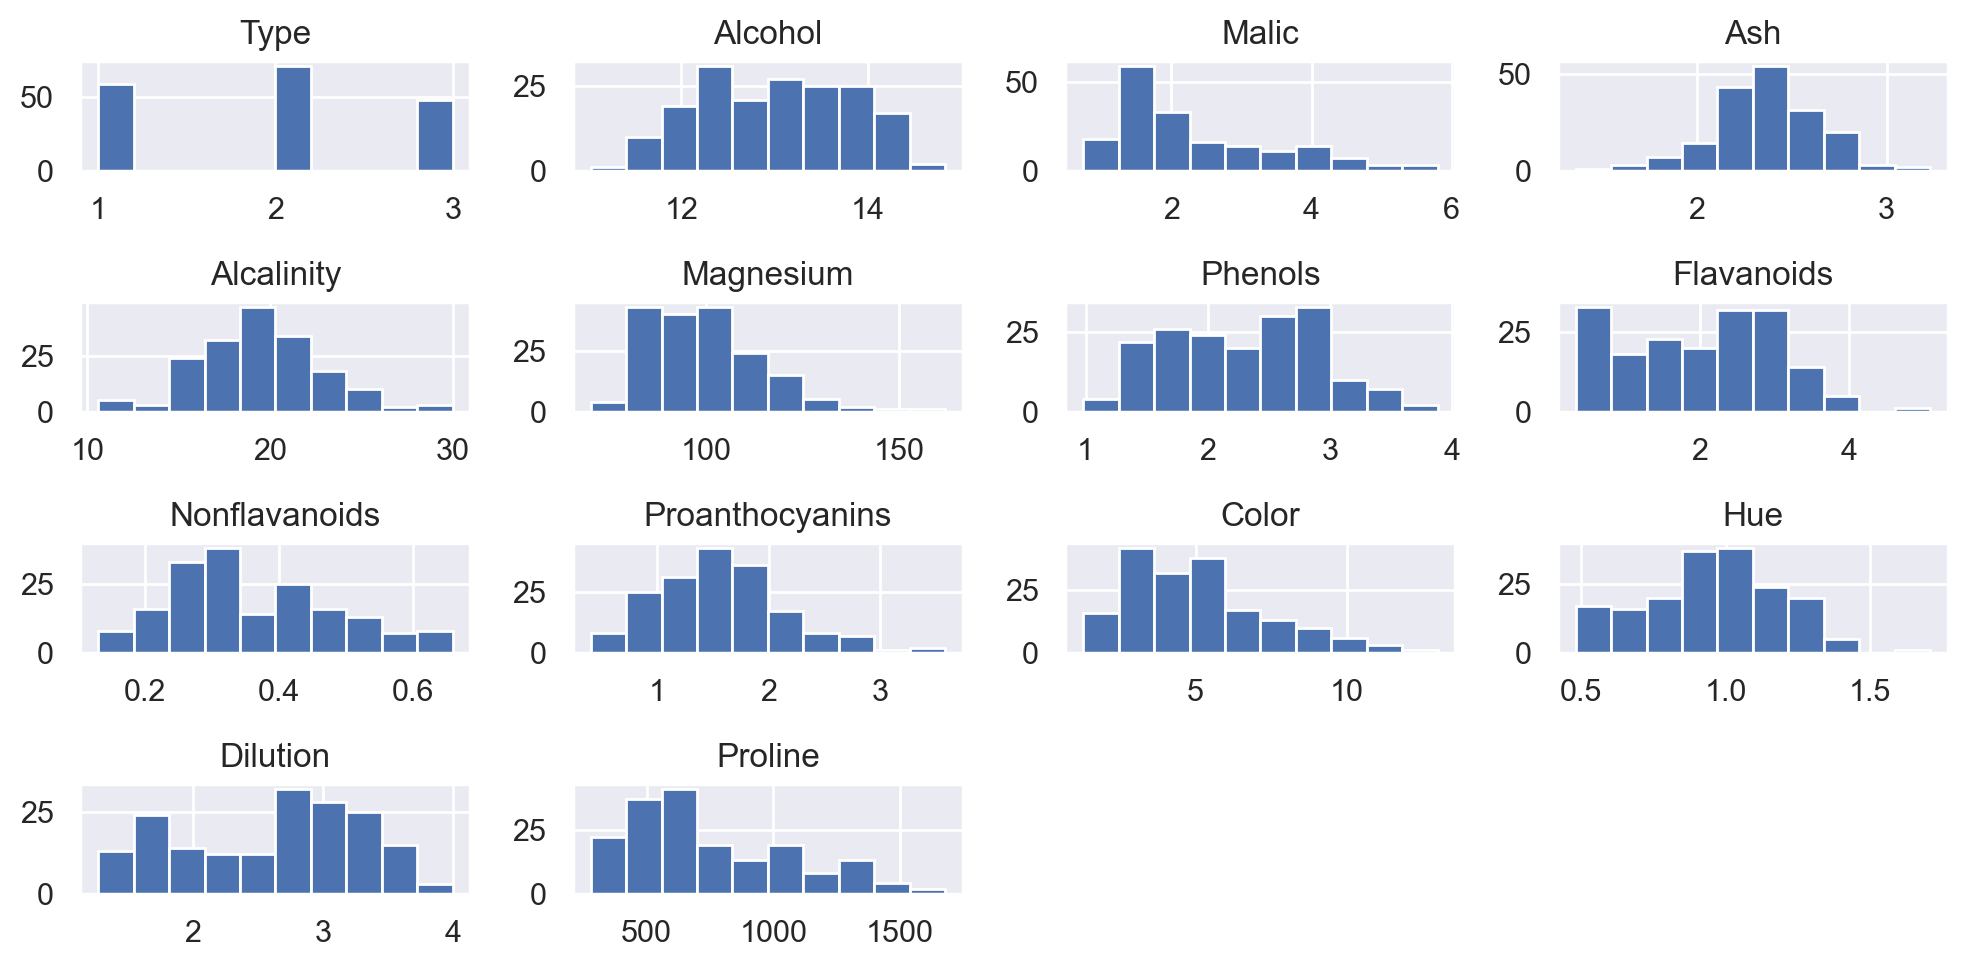

In [7]:
# Histograms
df.hist()
plt.tight_layout()
plt.show()

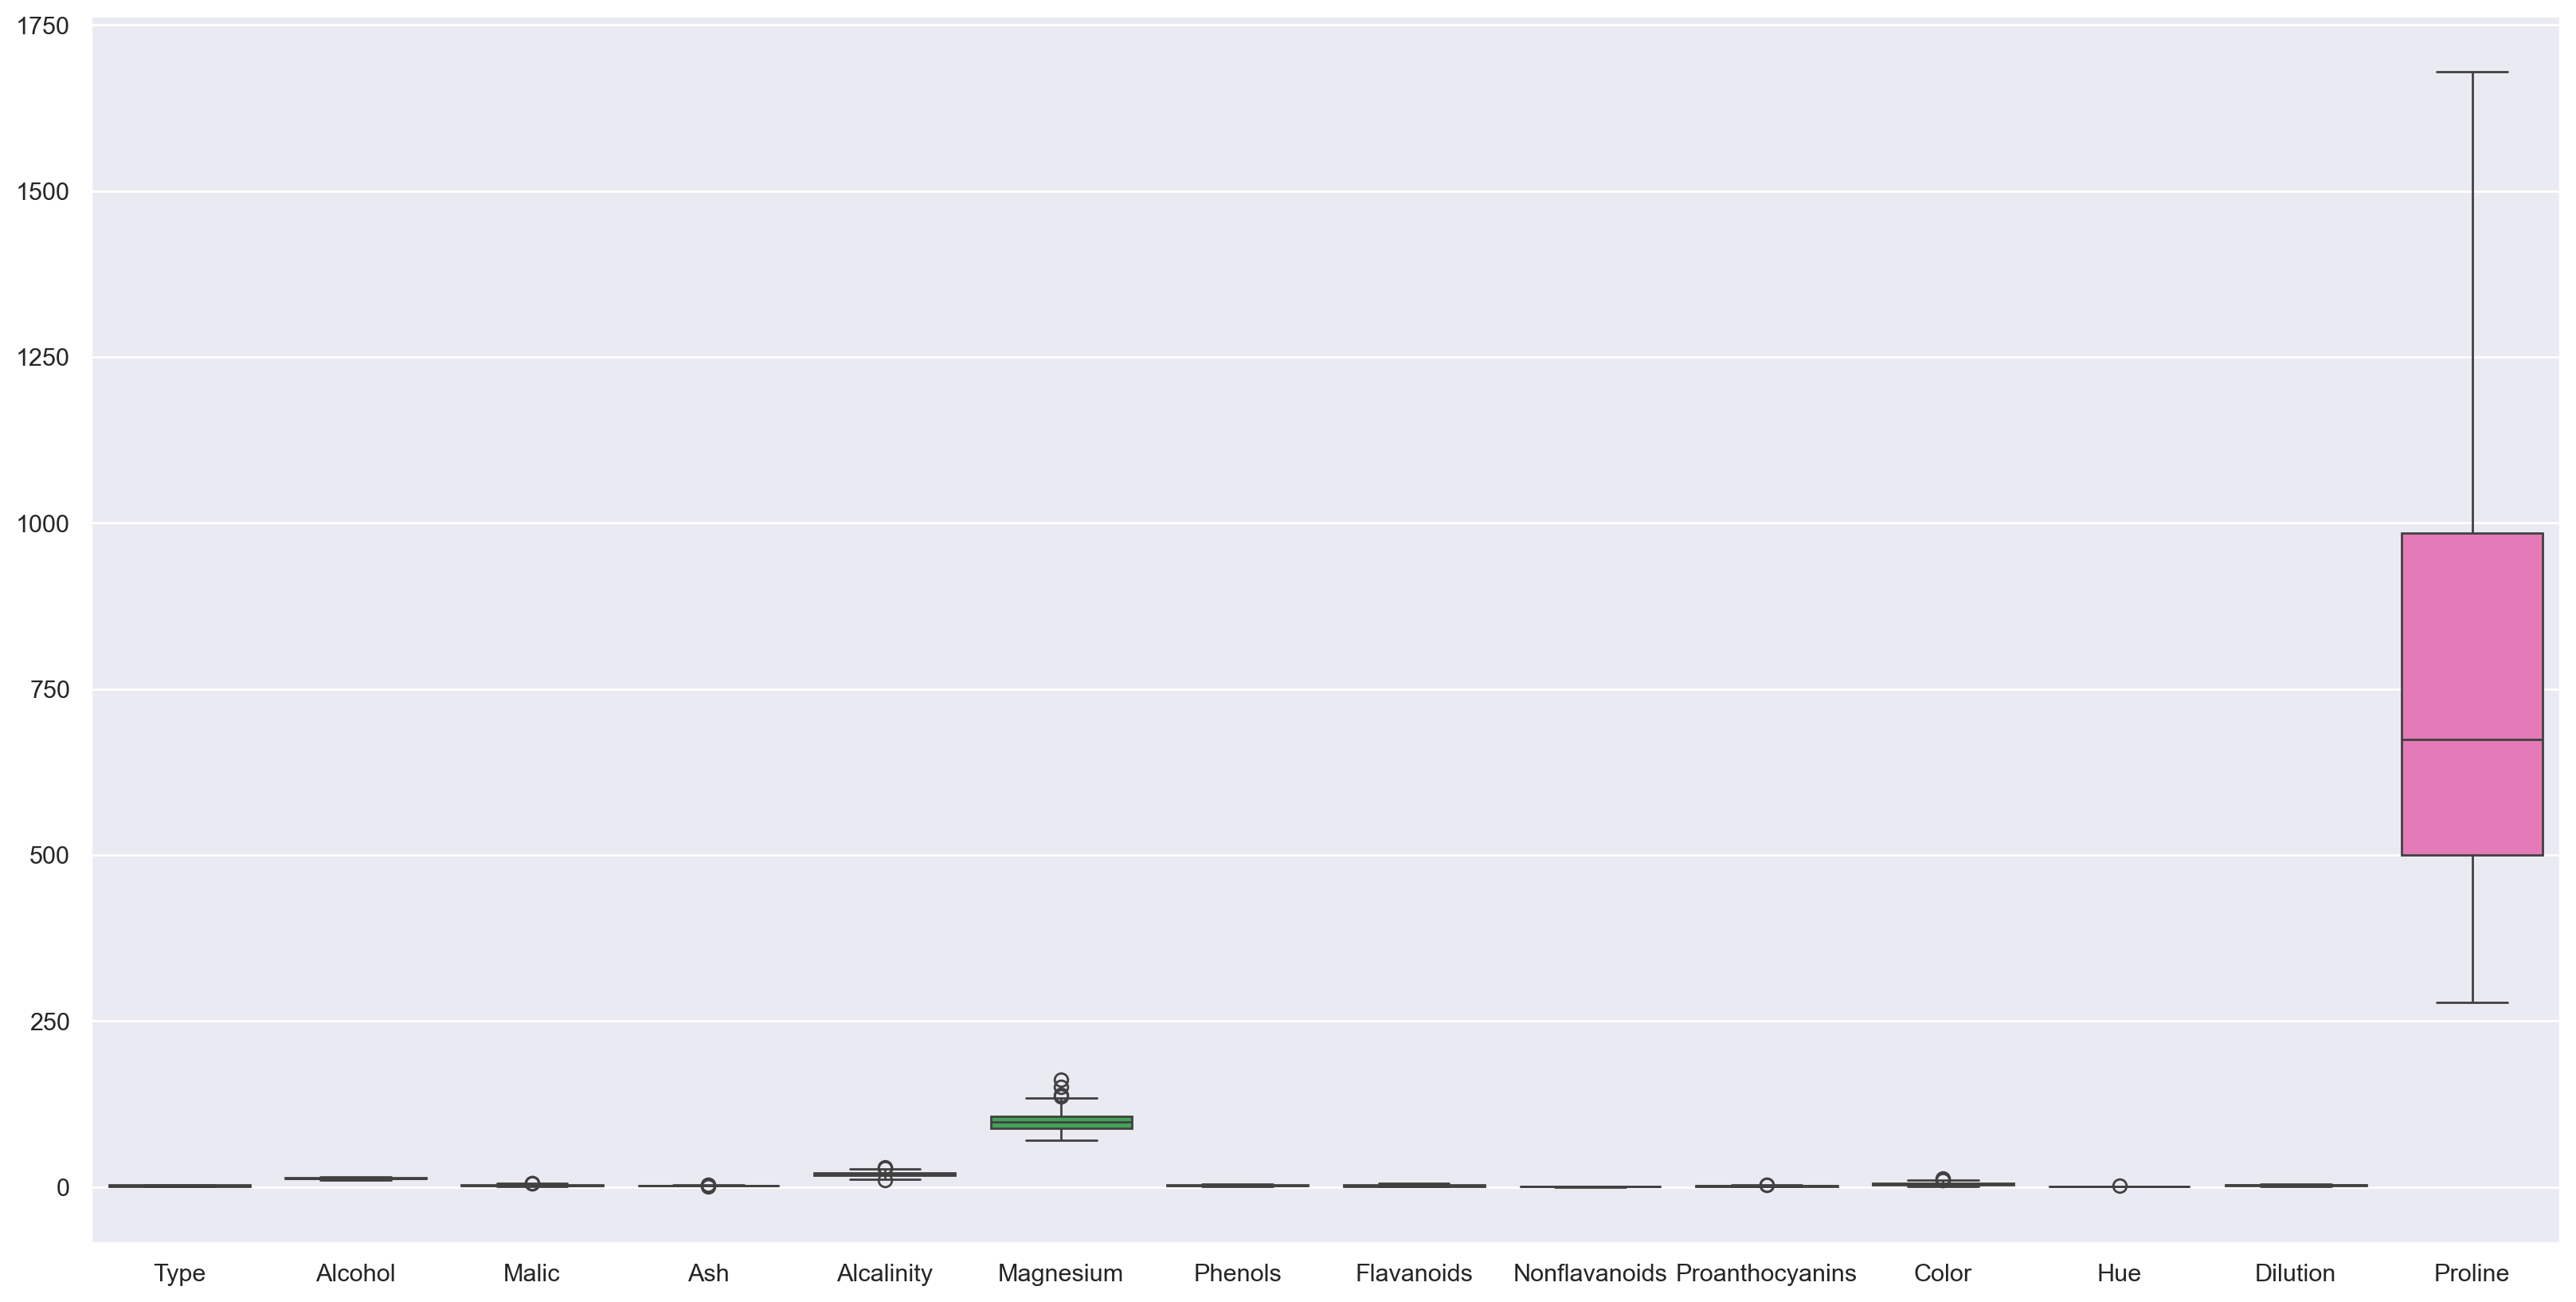

In [8]:
# Boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(df)
plt.show()

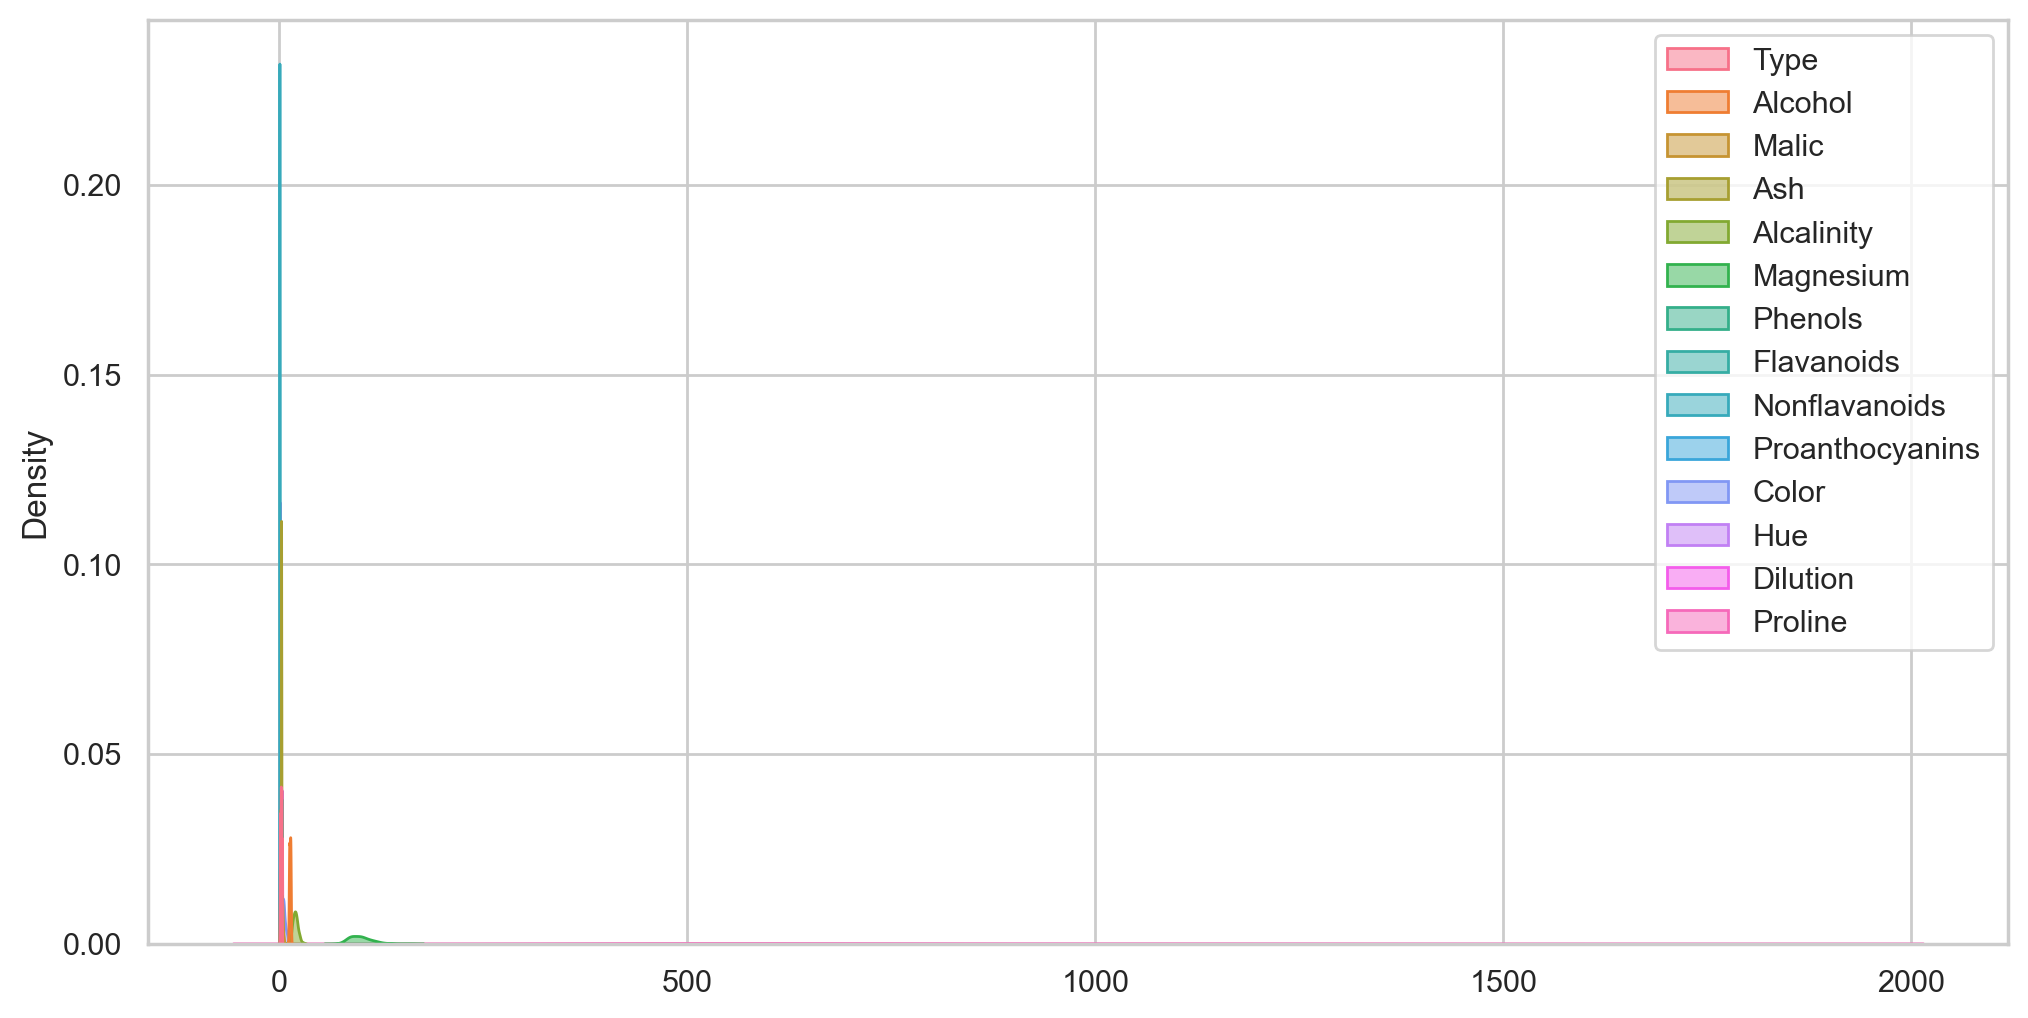

In [9]:

# Create a seaborn style density plot (KDE)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Optional: Set figure size
sns.kdeplot(df, fill=True, color="b", alpha=0.5)
plt.show()

In [10]:
# Corelation matrix

In [11]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


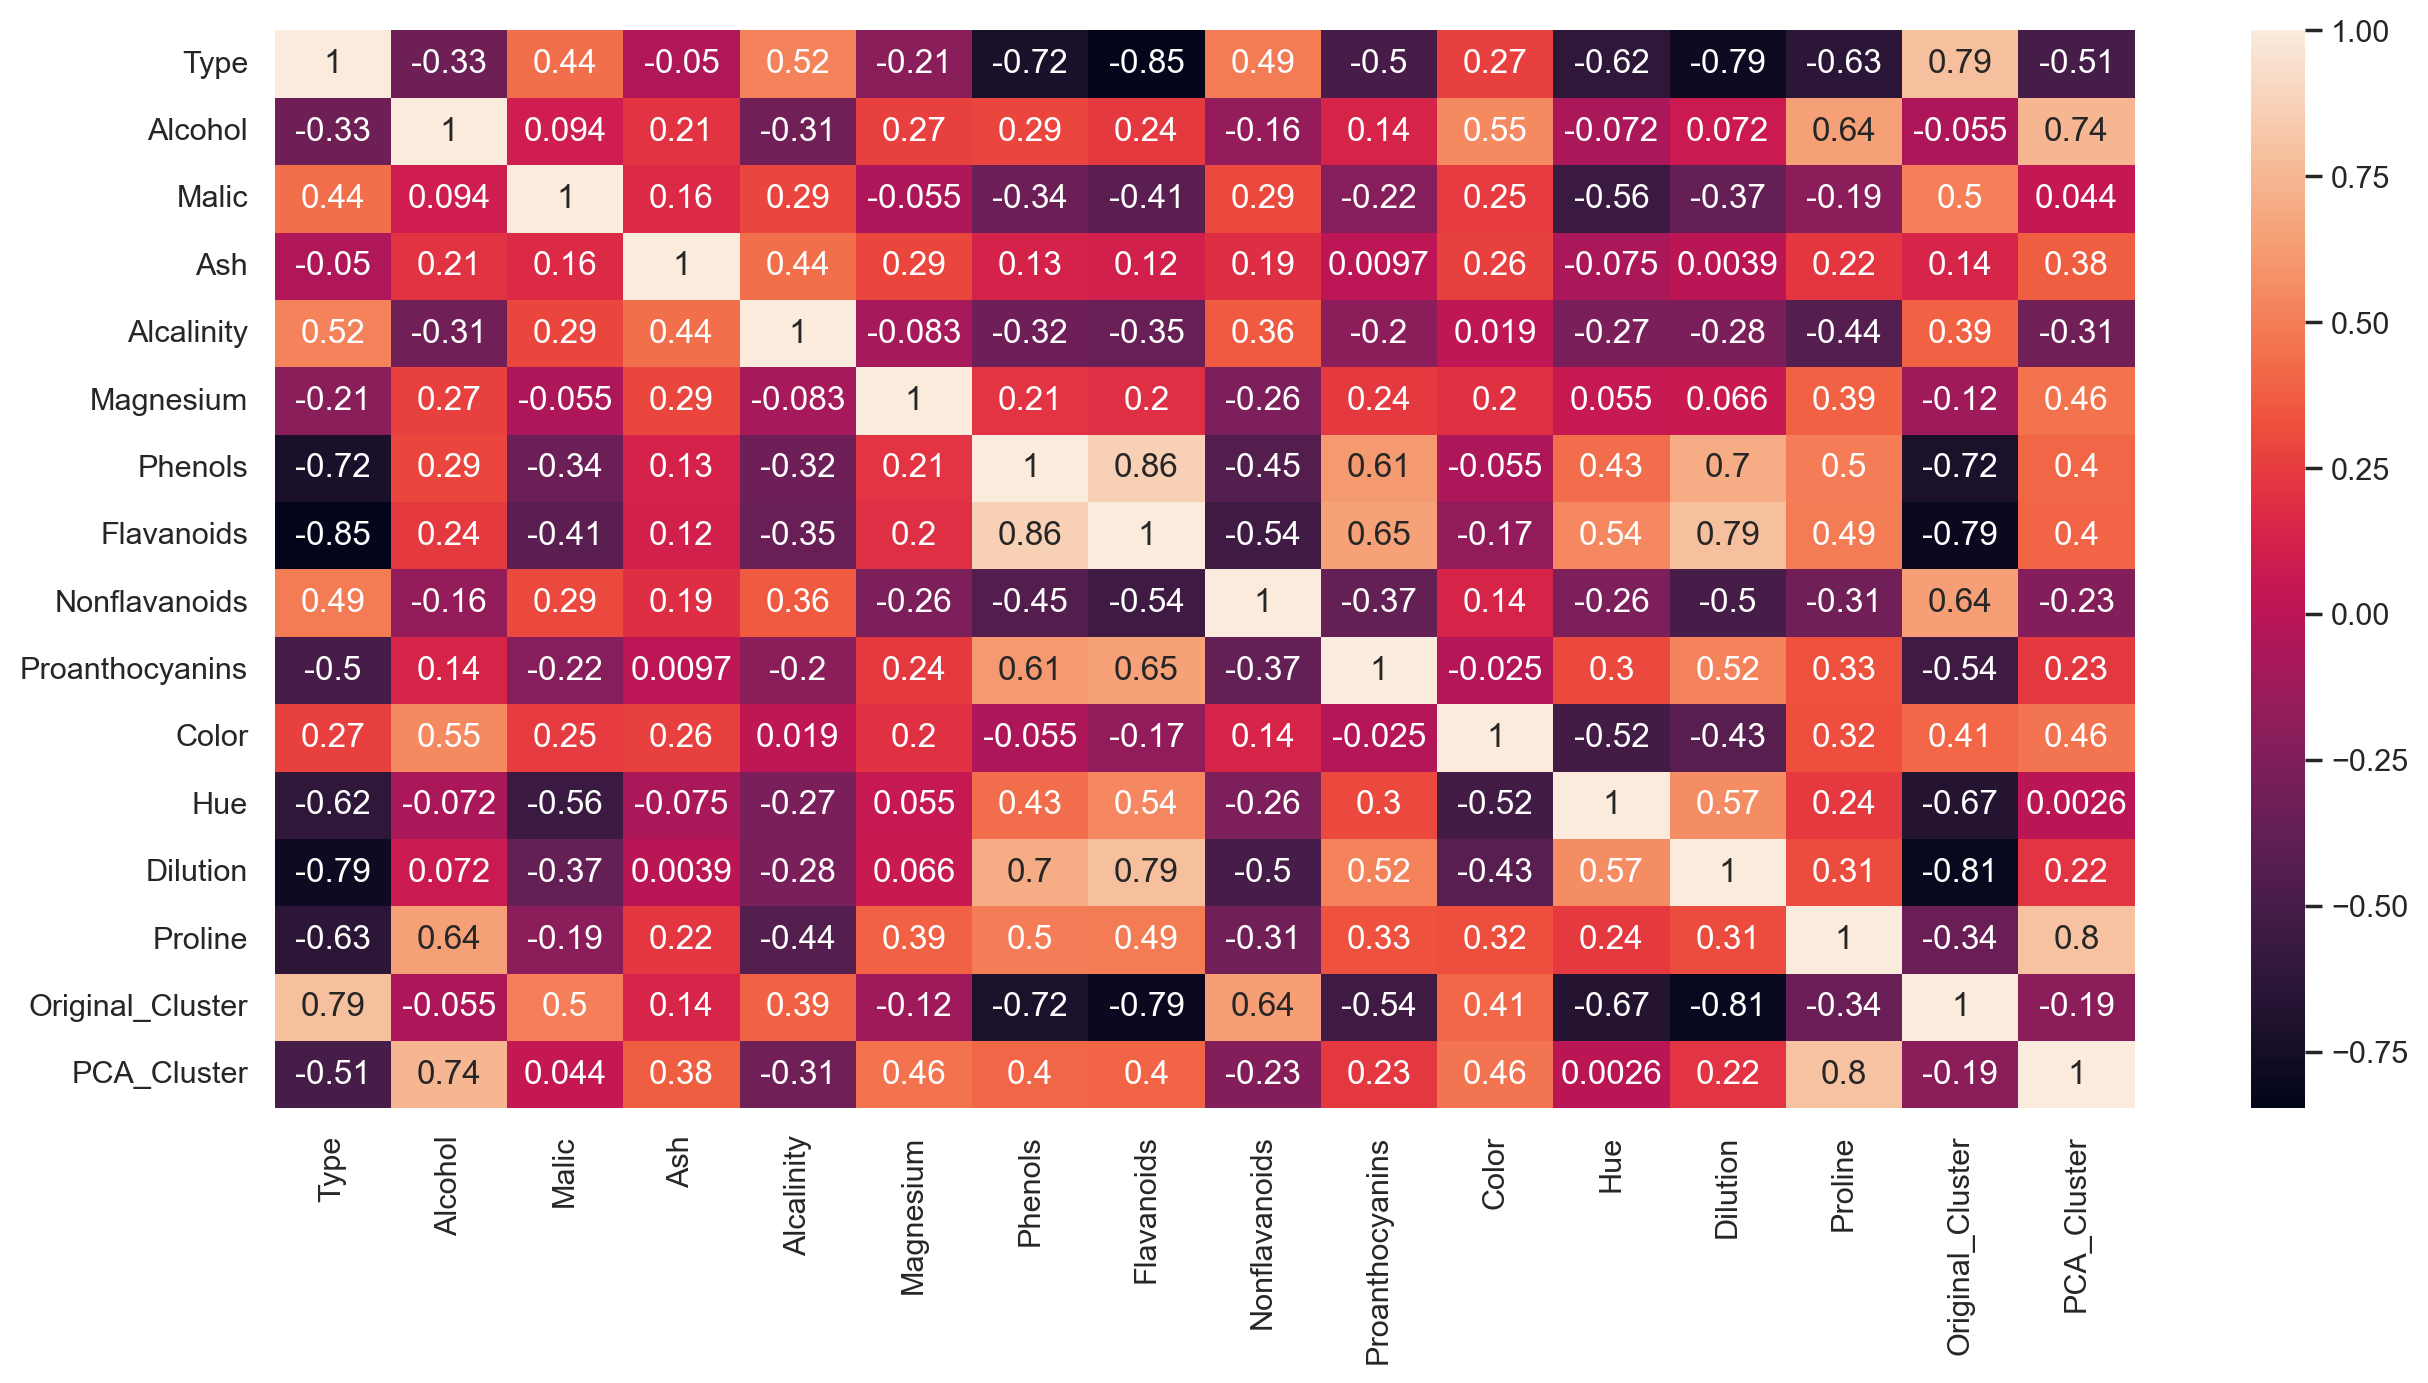

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Dimensionality Reduction with PCA:

## Standard Deviation

In [13]:
# standardize the data
sc=StandardScaler()
stand_data=sc.fit_transform(df)

In [14]:
# Set the number of components
n_components = 2  # Example: Reduce to 2 components

In [15]:
# Implement PCA to reduce the dimensionality of the dataset
# Apply PCA
pc = PCA(n_components=n_components)
principal_components = pc.fit_transform(stand_data)

In [16]:
# Convert the result to a DataFrame
principal_df = pd.DataFrame(principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])

In [17]:
# Print the resulting principal components
print(principal_df.head())

   Principal Component 1  Principal Component 2
0              -3.522934               1.453098
1              -2.528858              -0.330019
2              -2.785029               1.036936
3              -3.922588               2.768210
4              -1.407511               0.867773


In [18]:
# Explained variance
explained_variance = pc.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.2f}")

Explained Variance Ratio: [0.39542486 0.17836259]
Total Explained Variance: 0.57


In [19]:
# Apply PCA
pca=PCA()
pca.fit(stand_data)

PCA()

## Scree plot

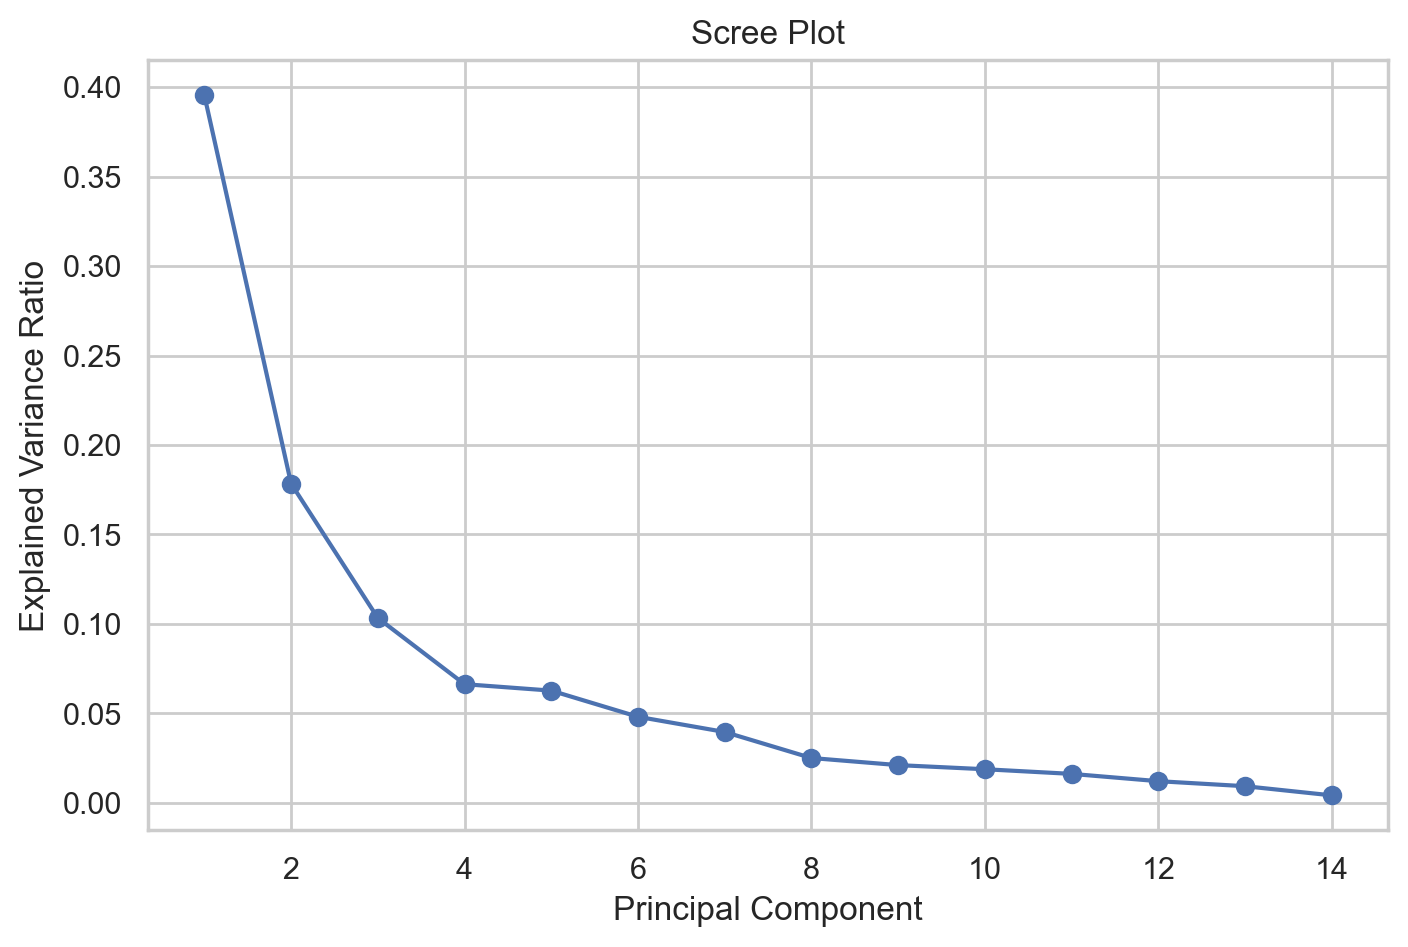

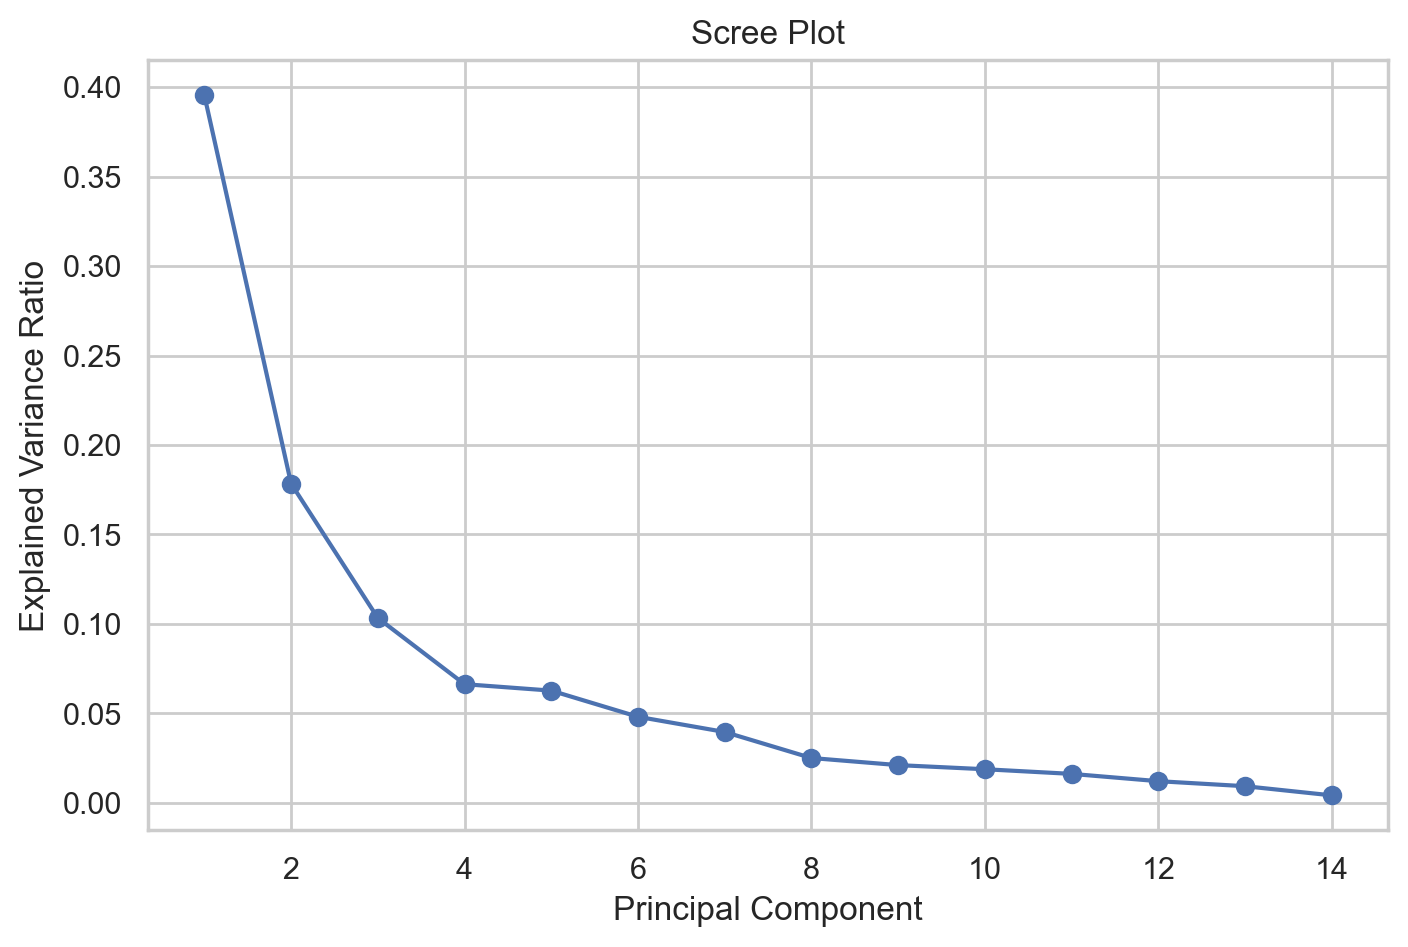

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

## cumulative explained variance.

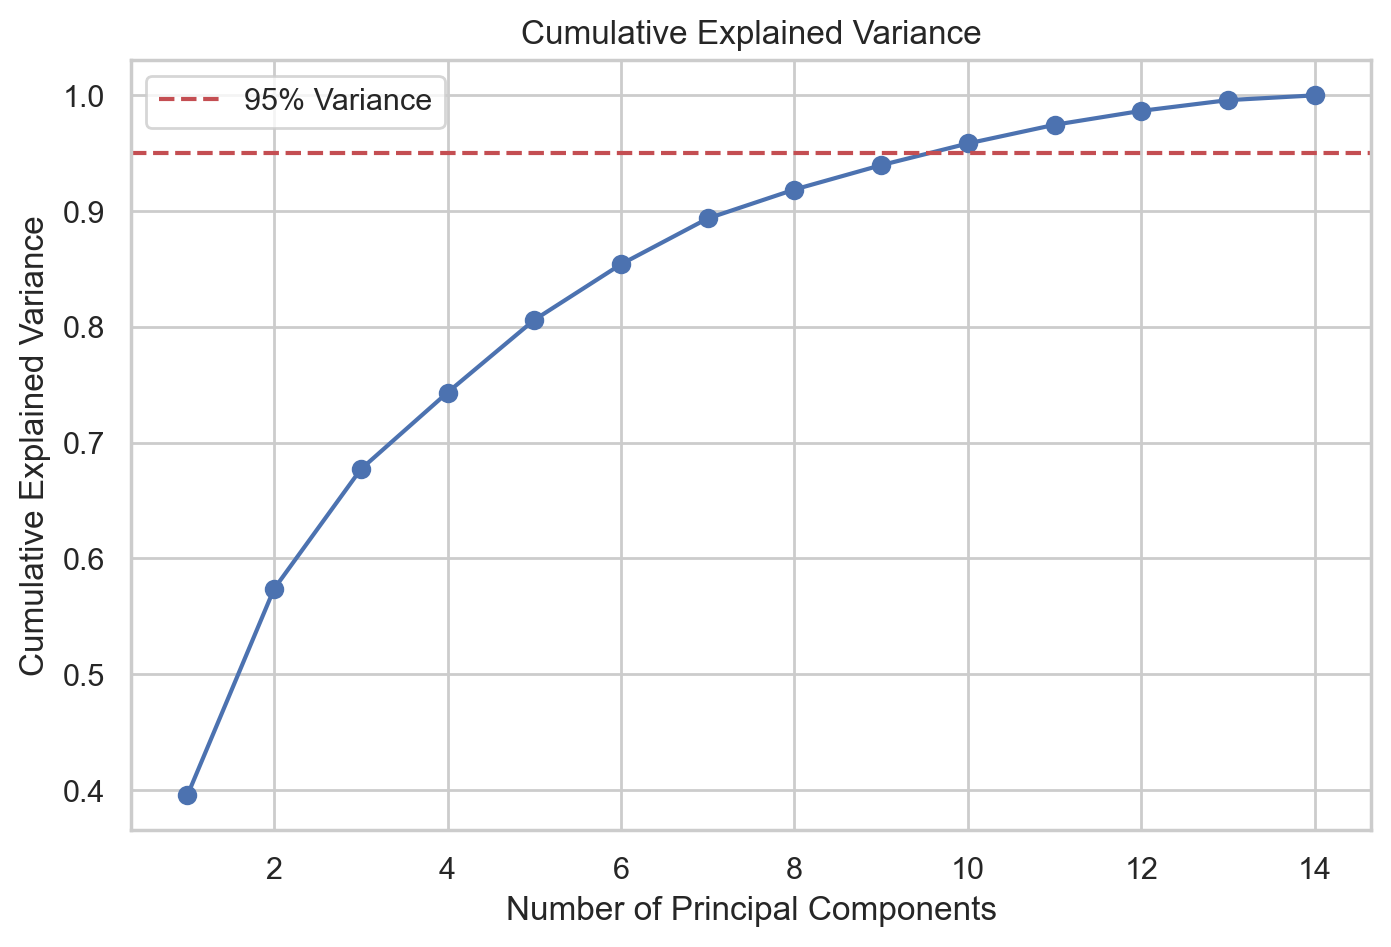

In [21]:
# Cumulative explained variance

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

### Transforming data into the principal component

In [22]:
pca_optimal = PCA(n_components=0.95)  # Retain 95% of the variance
data_reduced = pca_optimal.fit_transform(stand_data)
print("Reduced dataset shape:", data_reduced.shape)
print(data_reduced)

Reduced dataset shape: (178, 10)
[[-3.5229339   1.45309844 -0.16479549 ... -0.05563728 -0.45876506
  -1.06556955]
 [-2.52885806 -0.33001925 -2.02670665 ... -1.01037189  0.21880609
   0.02018203]
 [-2.78502898  1.03693595  0.9832377  ...  0.26895705  1.22276949
   0.10624913]
 ...
 [ 3.02727243  2.75604024 -0.94080304 ... -0.05254455 -0.02788135
   0.21274935]
 [ 2.75522166  2.29378408 -0.55047368 ... -0.42651198  0.04878416
  -0.47979317]
 [ 3.49633565  2.76060799  1.01315115 ...  0.32500213 -0.7199834
  -0.07990775]]


#  Clustering with Original Data

In [23]:
from sklearn.cluster import KMeans

In [24]:
# Apply K-means clustering (let's assume 3 clusters for now)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(stand_data)

#Get the cluster labels for each wine sample
cluster_labels = kmeans.labels_

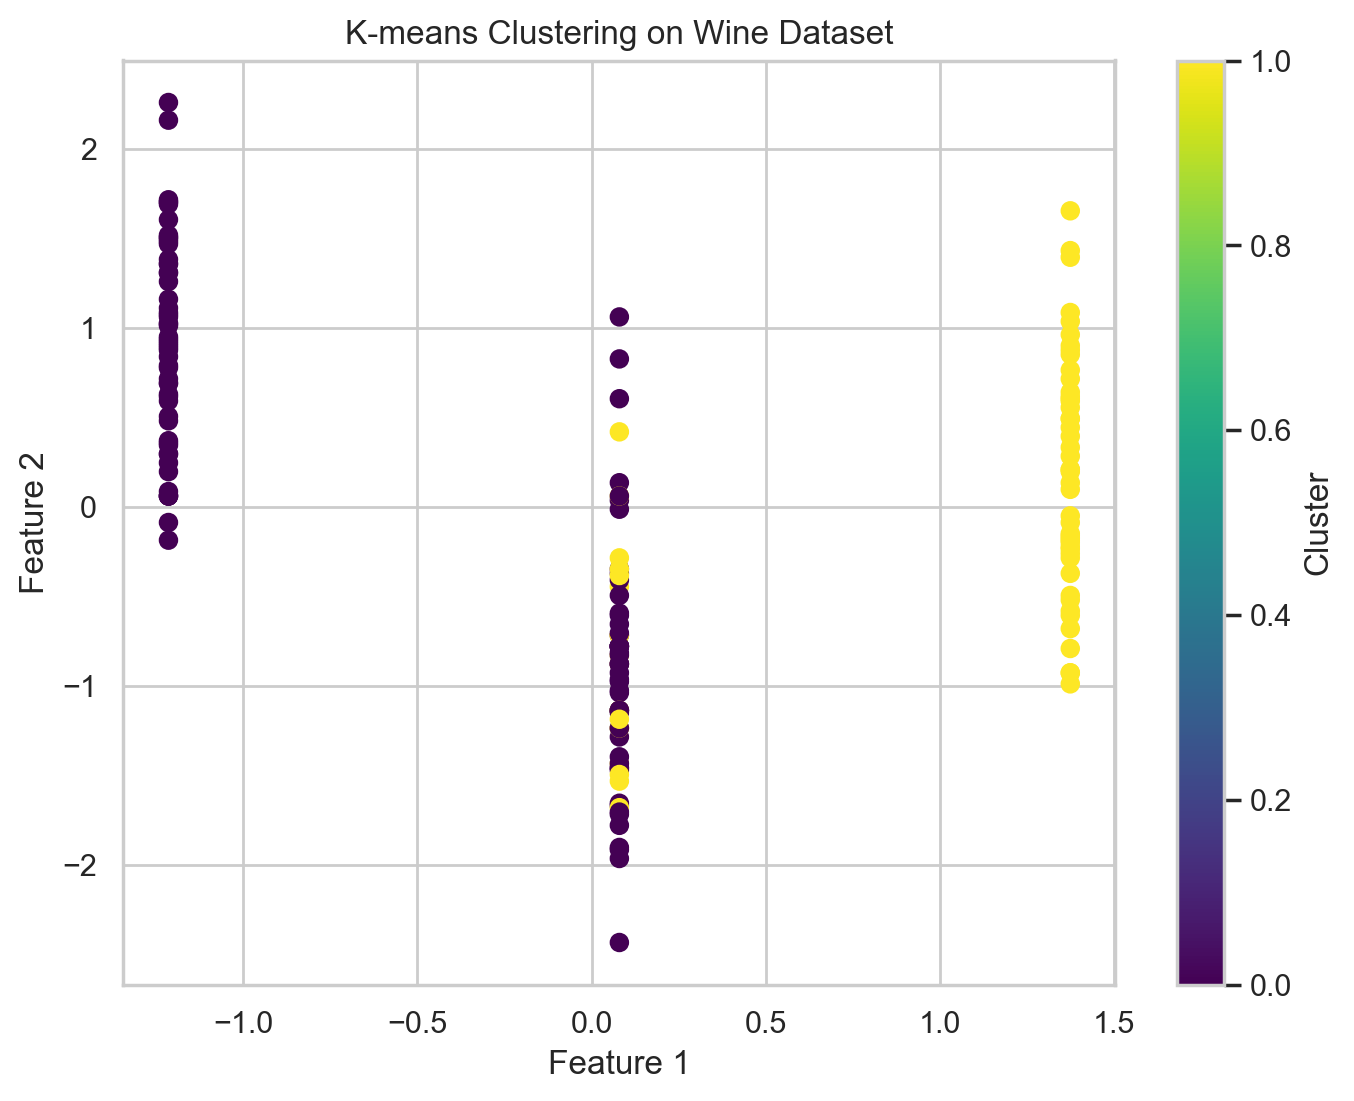

In [25]:
# 4. Visualizing the clustering results
# Let's visualize the first two principal components for simplicity
plt.figure(figsize=(8, 6))
plt.scatter(stand_data[:, 0], stand_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-means Clustering on Wine Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()

In [26]:
# Evaluating

from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette = silhouette_score(df, cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.08425912913659277


In [27]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df,  cluster_labels)
print("Davies–Bouldin Index:", davies_bouldin)

Davies–Bouldin Index: 1.8779461393865744


## Clustering with PCA Data

In [28]:
# Assume PCA-transformed dataset (2 components)
pca_transformed_data = principal_components  

In [29]:
# Apply K-means clustering
n_clusters = 3  # Same as used for the original dataset
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(pca_transformed_data)

KMeans(n_clusters=3, random_state=42)

In [30]:
# Get cluster labels for PCA-transformed data
pca_cluster_labels = kmeans_pca.labels_

In [31]:
# Add cluster labels to a DataFrame for PCA-transformed data
pca_cluster_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2'])
pca_cluster_df['Cluster'] = pca_cluster_labels

In [32]:
pca_cluster_df.head()

,PC1,PC2,Cluster
0,-3.522934,1.453098,2
1,-2.528858,-0.330019,2
2,-2.785029,1.036936,2
3,-3.922588,2.768210,2
4,-1.407511,0.867773,2


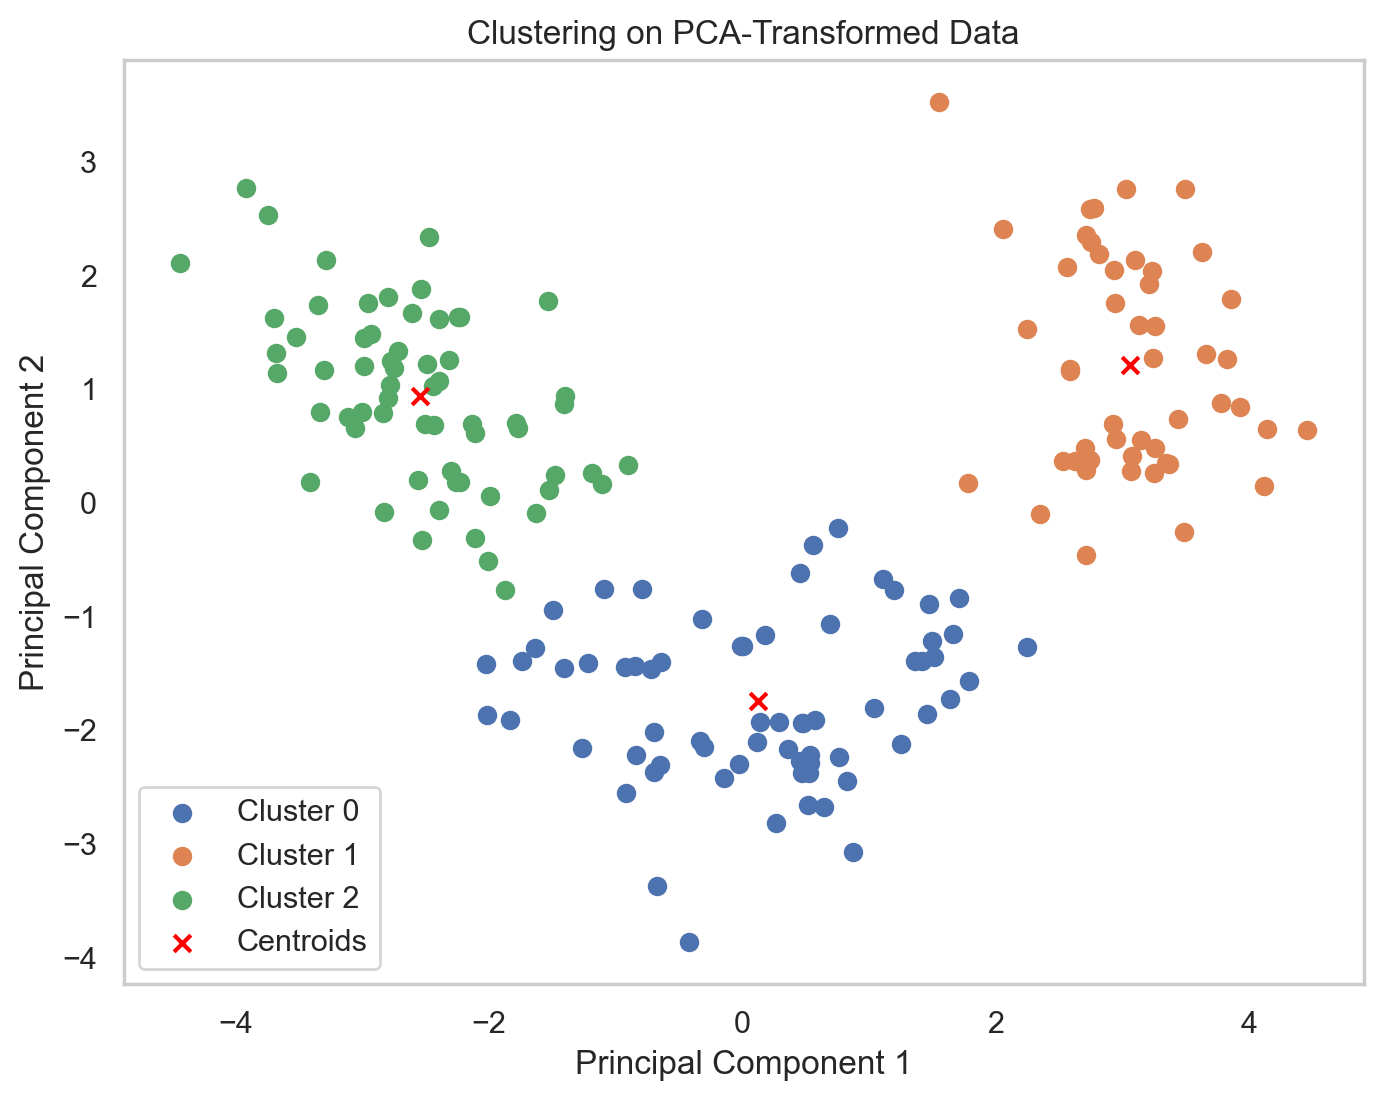

In [33]:
# Plot PCA-transformed data with clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(
        pca_transformed_data[pca_cluster_labels == cluster, 0],
        pca_transformed_data[pca_cluster_labels == cluster, 1],
        label=f'Cluster {cluster}'
    )

# Plot centroids
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
            c='red', marker='x', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering on PCA-Transformed Data')
plt.legend()
plt.grid()
plt.show()

### Compare the clustering results for PCA transform data with the Original data

In [58]:
# Add original and PCA-based cluster labels to the original DataFrame
comparison_df=pd.DataFrame({
'Original_Cluster' : cluster_labels,
'PCA_Cluster' : pca_cluster_labels
})
# Compare cluster assignments
comparison = df[['Original_Cluster', 'PCA_Cluster']].head(10)
print("Cluster Label Comparison:")
print(comparison)

Cluster Label Comparison:
   Original_Cluster  PCA_Cluster
0                 0            2
1                 0            2
2                 0            2
3                 0            2
4                 0            2
5                 0            2
6                 0            2
7                 0            2
8                 0            2
9                 0            2


In [59]:
# Check agreement between clusters
cluster_agreement = (comparison_df['Original_Cluster'] == comparison_df['PCA_Cluster']).mean()
print(f"Cluster Agreement: {cluster_agreement * 100:.2f}%")

Cluster Agreement: 56.18%


In [35]:
# Original dataset
original_silhouette = silhouette_score(stand_data, cluster_labels)
print(f"Silhouette Score (Original Data): {original_silhouette:.2f}")

# PCA-transformed dataset
pca_silhouette = silhouette_score(pca_transformed_data, pca_cluster_labels)
print(f"Silhouette Score (PCA-Transformed Data): {pca_silhouette:.2f}")

# Compare inertia
print(f"Inertia (Original Data): {kmeans.inertia_}")
print(f"Inertia (PCA-Transformed Data): {kmeans_pca.inertia_}")

Silhouette Score (Original Data): 0.29
Silhouette Score (PCA-Transformed Data): 0.60
Inertia (Original Data): 1727.228660932003
Inertia (PCA-Transformed Data): 236.4775051306489


# Comparison and Analysis

### Compare the clustering results by visualizing the clusters

In [36]:
# Compare Silhouette Scores

# Calculate silhouette scores
silhouette_original = silhouette_score(stand_data, cluster_labels)
silhouette_pca = silhouette_score(pca_transformed_data, pca_cluster_labels)

print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")
print(f"Silhouette Score (PCA-Transformed Data): {silhouette_pca:.2f}")

Silhouette Score (Original Data): 0.29
Silhouette Score (PCA-Transformed Data): 0.60


In [37]:
# Compare Inertia Values
print(f"Inertia (Original Data): {kmeans.inertia_}")
print(f"Inertia (PCA-Transformed Data): {kmeans_pca.inertia_}")

Inertia (Original Data): 1727.228660932003
Inertia (PCA-Transformed Data): 236.4775051306489


### similarities or differences observed in the clustering results

The clustering results from the PCA-transformed data show better performance than the original data:

Silhouette Score: The PCA-transformed data has a higher score (0.60 vs. 0.29), indicating that the clusters are more well-defined and separated.
Inertia: The PCA-transformed data has much lower inertia (236.48 vs. 1727.23), meaning the clusters are tighter and more compact after dimensionality reduction.

### Reflect on the impact of dimensionality reduction on clustering performance.

Dimensionality reduction, like *PCA*, improves clustering performance by:

1. *Better Cluster Separation*: PCA removes noisy or irrelevant features, leading to more distinct clusters (higher silhouette score).
2. *Tighter Clusters*: Reduces inertia, making clusters more compact and cohesive.
3. *Reduced Noise*: Eliminates less informative dimensions, reducing overfitting and improving robustness.
4. *Efficiency*: Reduces computational cost, especially in high-dimensional datasets.

Overall, *PCA enhances clustering* by focusing on key features, improving both performance and efficiency.

### Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Trade-offs Between PCA and Clustering on Original Data:
PCA:

Pros: Improves cluster separation, reduces noise, speeds up clustering, and prevents overfitting.
Cons: May lose important information and makes results harder to interpret.
Original Data:

Pros: Retains all features and keeps data interpretable.
Cons: Can include noise, leading to poor clustering, and is computationally expensive.

# Conclusion and Insights

### 1. Key Findings and Insights
- *PCA* reduces the dimensionality of data, retaining most of its variance, which can simplify clustering tasks.
- *Clustering on PCA-transformed data* often leads to clearer, more distinct clusters as noise and less relevant features are removed.
- *Clustering on original data* retains all feature information but may be more prone to noise and computationally expensive with high-dimensional data.

### 2. Practical Implications of Using PCA and Clustering
- *PCA* is useful when dealing with high-dimensional data or when you want to reduce computational complexity without losing significant patterns.
- *Clustering on PCA-transformed data* can help improve the separation between clusters by focusing on the most important features.
- *Clustering on the original data* may be necessary when the full feature set is important, and dimensionality reduction may discard vital information.

### 3. Recommendations
- *Use PCA* when the dataset has many features, and you suspect that some features are noisy or irrelevant, as it can help improve clustering performance and speed.
- *Use original data* when the full set of features is critical, and dimensionality reduction could result in the loss of important information.